In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])

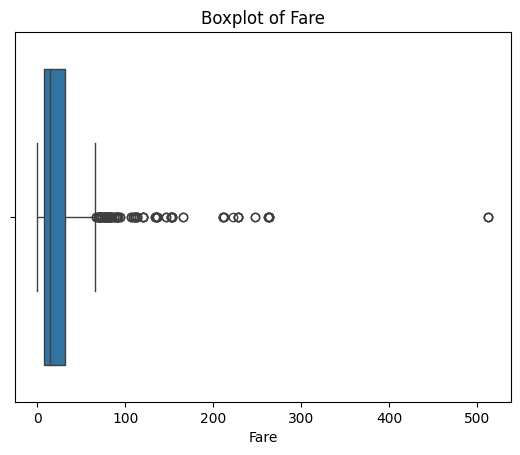

In [ ]:
# outliers detection of fare

sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [ ]:
#Extreme outliers (Fare > 300) likely correspond to luxury-class passengers.
#Action: Capped at the 99th percentile (Fare ≤ 300)

df['Fare'] = df['Fare'].clip(upper=300)


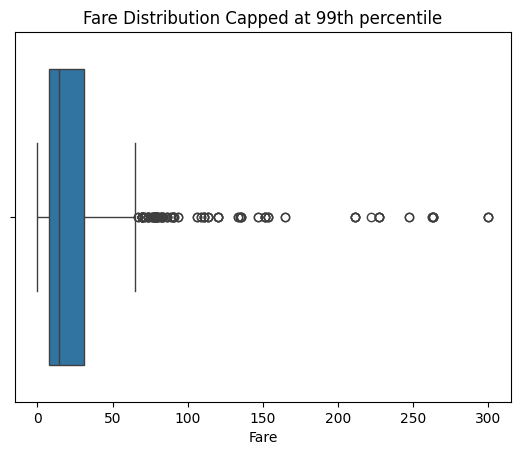

In [ ]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution Capped at 99th percentile')
plt.show()

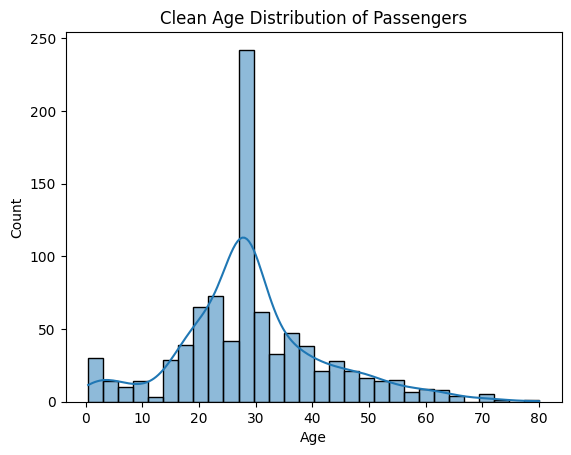

In [ ]:
#Univariate Analysis
# Age Distribution

# Plot clean data
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Clean Age Distribution of Passengers')
plt.show()

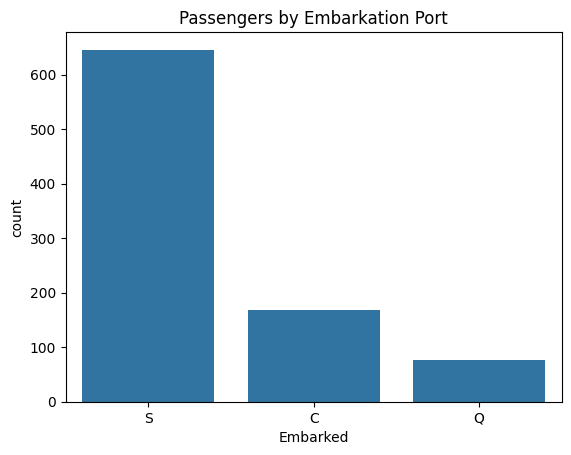

In [ ]:
#Embarked Location Counts

sns.countplot(x='Embarked', data=df)
plt.title('Passengers by Embarkation Port')
plt.show()

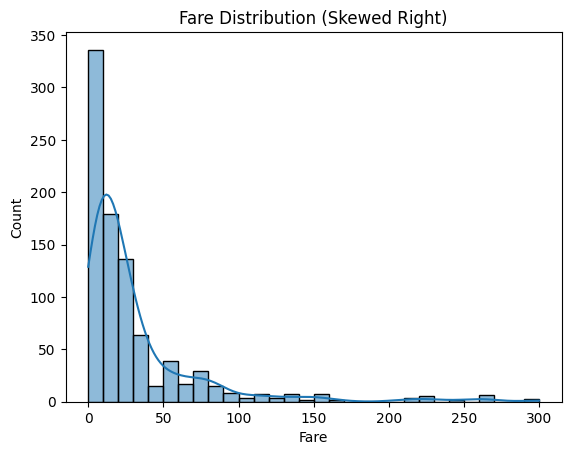

In [ ]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution (Skewed Right)')
plt.show()

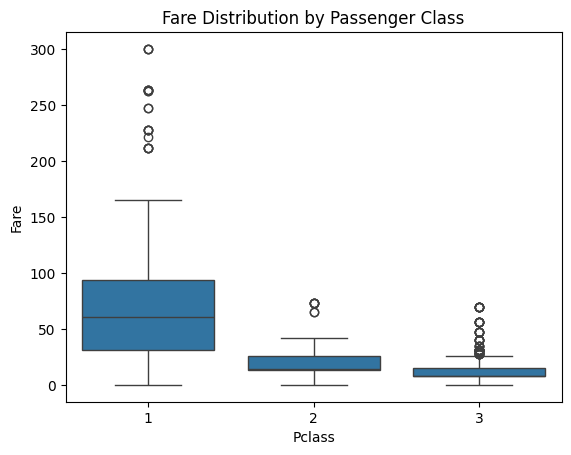

In [ ]:
#Bivariate Analysis

#Fare vs. Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

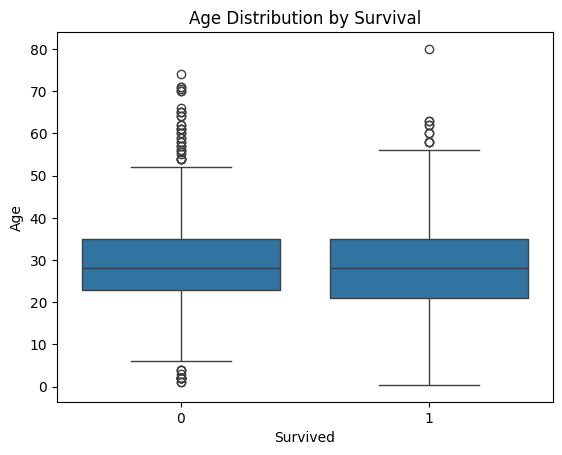

In [ ]:
#Age vs. Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

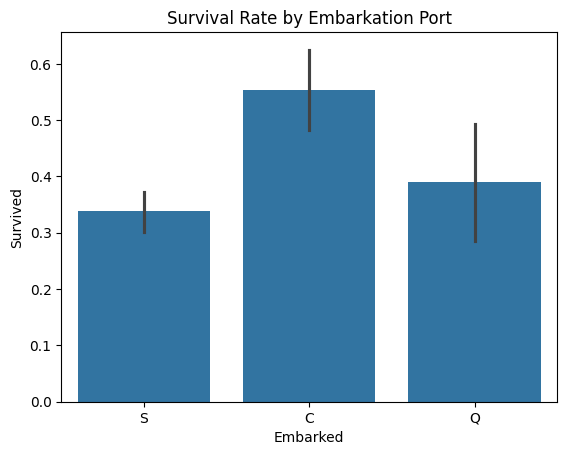

In [ ]:
#Embarked vs. Survival
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

In [ ]:
#Multivariate Analysis

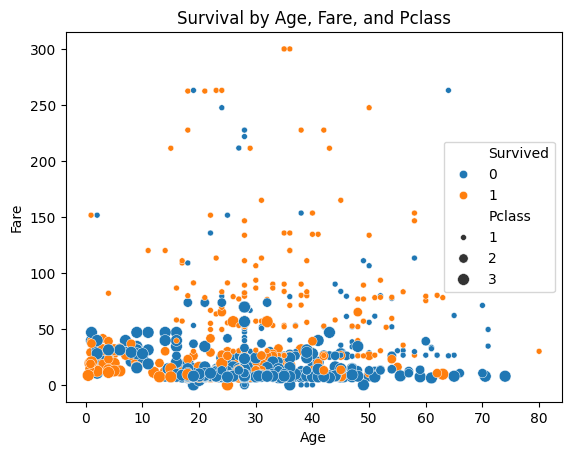

In [ ]:
#Pclass, Age, and Fare Impact on Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass', data=df)
plt.title('Survival by Age, Fare, and Pclass')
plt.show()

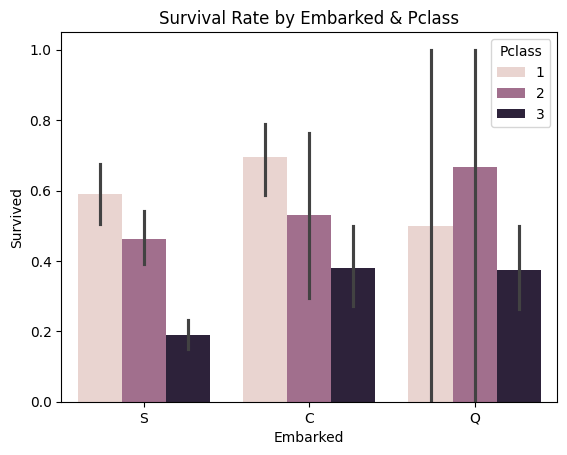

In [ ]:
#Embarked & Pclass Interaction on Survival
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Embarked & Pclass')
plt.show()


In [ ]:
#Target Variable (Survived) Analysis

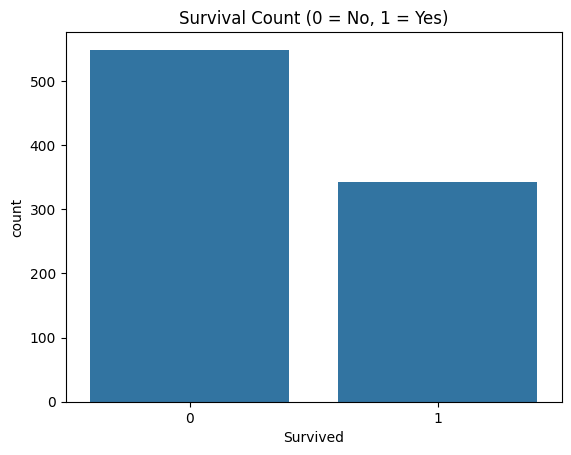

In [ ]:
# Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()